In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
from edm import report

## Data block

In [4]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Feature Engineering 

In [45]:
train_data.head(2)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [46]:
test_data.head(2)

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...


In [47]:
train_data.isnull().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

In [48]:
test_data.isnull().sum()

id              0
comment_text    0
dtype: int64

In [49]:
train_data['comment_text'].value_counts().head()

Well said.    184
No.           160
Exactly.      132
Yes.          127
Thank you.    120
Name: comment_text, dtype: int64

In [50]:
print('% unique comments:', (train_data['comment_text'].nunique()/ train_data['comment_text'].shape[0])*100)

% unique comments: 98.66744160534198


In [51]:
train_comments = set(train_data['comment_text'].values)
test_comments = set(test_data['comment_text'].values)

#1170 unique comments from train data are in test data
len(train_comments.intersection(test_comments)), len(test_data.loc[test_data['comment_text'].isin(list(train_comments.intersection(test_comments)))])

(1170, 1522)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


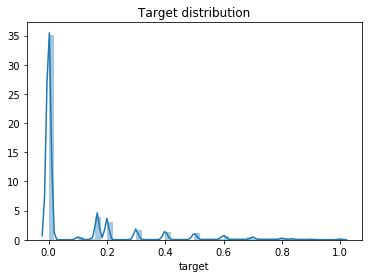

In [52]:
sns.distplot(train_data['target']).set_title('Target distribution')
plt.show()

In [53]:
train_data = train_data.reindex(sorted(train_data.columns), axis=1)

In [54]:
train_data.head()

,article_id,asian,atheist,bisexual,black,buddhist,christian,comment_text,created_date,disagree,...,rating,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,transgender,white,wow
0,2006,NaN,NaN,NaN,NaN,NaN,NaN,"This is so cool. It's like, 'would you want yo...",2015-09-29 10:50:41.987077+00,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
1,2006,NaN,NaN,NaN,NaN,NaN,NaN,Thank you!! This would make my life a lot less...,2015-09-29 10:50:42.870083+00,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
2,2006,NaN,NaN,NaN,NaN,NaN,NaN,This is such an urgent design problem; kudos t...,2015-09-29 10:50:45.222647+00,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
3,2006,NaN,NaN,NaN,NaN,NaN,NaN,Is this something I'll be able to install on m...,2015-09-29 10:50:47.601894+00,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
4,2006,0.0,0.0,0.0,0.0,0.0,0.0,haha you guys are a bunch of losers.,2015-09-29 10:50:48.488476+00,0,...,rejected,0,0.021277,0.0,0.893617,0.0,47,0.0,0.0,0


In [67]:
# Mutating date column and calculate counts and the means to visialize the trend
train_data['created_date'] = pd.to_datetime(train_data['created_date']).values.astype('datetime64[M]')
train_data['created_year'] = pd.to_datetime(train_data['created_date']).values.astype('datetime64[Y]')
counts = train_data.groupby(['created_date'])['target'].mean().sort_index().reset_index()
means = train_data.groupby(['created_date'])['target'].count().sort_index().reset_index()

In [37]:
train_data.head()

,article_id,asian,atheist,bisexual,black,buddhist,christian,comment_text,created_date,disagree,...,rating,sad,severe_toxicity,sexual_explicit,target,threat,toxicity_annotator_count,transgender,white,wow
0,2006,NaN,NaN,NaN,NaN,NaN,NaN,"This is so cool. It's like, 'would you want yo...",2015-09-01,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
1,2006,NaN,NaN,NaN,NaN,NaN,NaN,Thank you!! This would make my life a lot less...,2015-09-01,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
2,2006,NaN,NaN,NaN,NaN,NaN,NaN,This is such an urgent design problem; kudos t...,2015-09-01,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
3,2006,NaN,NaN,NaN,NaN,NaN,NaN,Is this something I'll be able to install on m...,2015-09-01,0,...,rejected,0,0.000000,0.0,0.000000,0.0,4,NaN,NaN,0
4,2006,0.0,0.0,0.0,0.0,0.0,0.0,haha you guys are a bunch of losers.,2015-09-01,0,...,rejected,0,0.021277,0.0,0.893617,0.0,47,0.0,0.0,0


In [61]:
counts.head(2)

,created_date,target
0,2015-09-01,0.064255
1,2015-10-01,0.067268


In [62]:
means.head(2)

,created_date,target
0,2015-09-01,324
1,2015-10-01,260


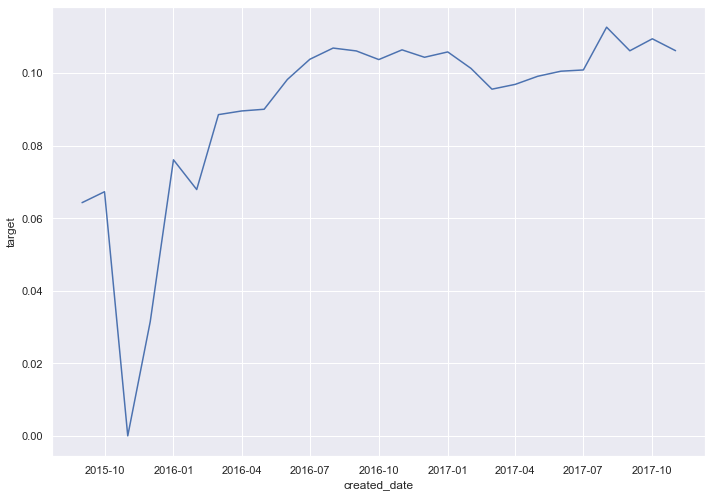

In [65]:
#Rate of toxic comments through the years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='created_date', y='target', data=counts)
plt.show()

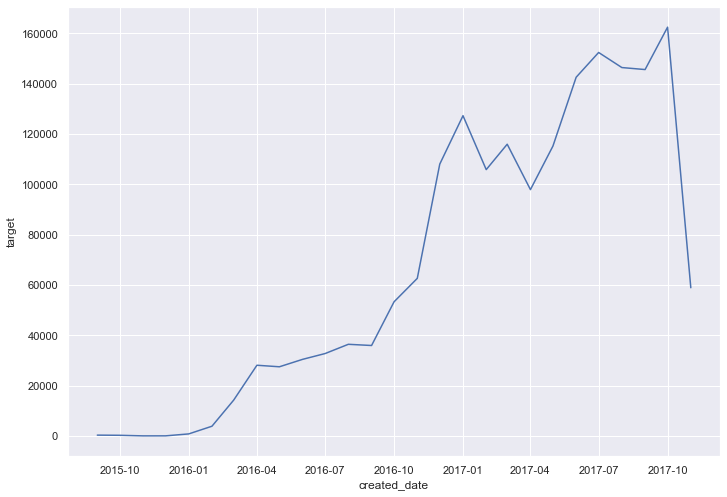

In [66]:
#Counts of comments through the years
sns.lineplot(x='created_date', y='target', data=means)
plt.show()

#### We can see how despite the increase of number of comments the toxicity rate is quite stable.

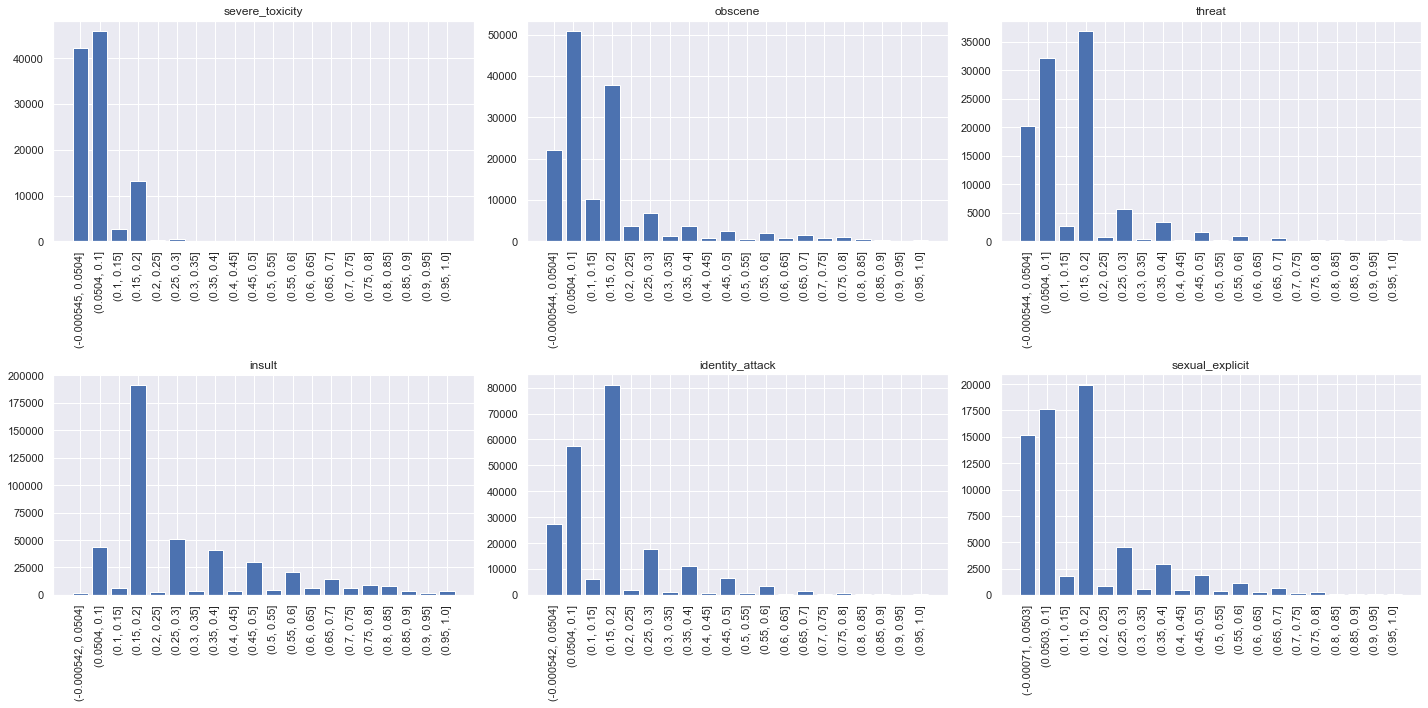

In [87]:
fig = plt.figure(figsize=(20,10))
i=0
fig.subplots_adjust(hspace=.5)
for col in ['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']:
    i+=1
    df = train_data.loc[train_data[col] > 0]
    hist_df = pd.cut(df[col], 20).value_counts().sort_index().reset_index().rename(columns={'index': 'bins'})
    plt.subplot(2, 3, i)
    plt.bar(hist_df.bins.astype(str), hist_df[col])
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Threat level distribution

In [88]:
# look into more time series modelling at https://plot.ly/python/time-series/

In [96]:
df = train_data.sample(frac=0.02)
sents = df["comment_text"].fillna("_##_").values
labels = df["target"].values

In [97]:
print(report.get_difficulty_report(sents, labels))

----> Building bag of words representations...


[----------                    ] : 11133 of 36097, 30.8% : Est. 1.0 mins Remaining ] : 157 of 36097, 0.4% : Est. 1.7 mins Remaining                     ] : 237 of 36097, 0.7% : Est. 1.5 mins Remaining               ] : 316 of 36097, 0.9% : Est. 1.5 mins Remaining        ] : 405 of 36097, 1.1% : Est. 1.5 mins Remaining                      ] : 478 of 36097, 1.3% : Est. 1.6 mins Remaining ] : 561 of 36097, 1.6% : Est. 1.5 mins Remaining                         ] : 640 of 36097, 1.8% : Est. 1.5 mins Remaining      ] : 733 of 36097, 2.0% : Est. 1.5 mins Remaining                ] : 821 of 36097, 2.3% : Est. 1.4 mins Remaining           ] : 905 of 36097, 2.5% : Est. 1.5 mins Remaining                       ] : 991 of 36097, 2.7% : Est. 1.5 mins Remaining                ] : 1077 of 36097, 3.0% : Est. 1.4 mins Remaining     ] : 1157 of 36097, 3.2% : Est. 1.4 mins Remaining                     ] : 1249 of 36097, 3.5% : Est. 1.4 mins Remaining--                            ] : 1343 of 36097, 3.7

[----------------------------  ] : 33055 of 36097, 91.6% : Est. 0.1 mins Remaining----------------           ] : 22386 of 36097, 62.0% : Est. 0.6 mins Remaining      ] : 22477 of 36097, 62.3% : Est. 0.5 mins Remaining] : 22557 of 36097, 62.5% : Est. 0.5 mins Remaining         ] : 22651 of 36097, 62.8% : Est. 0.5 mins Remaining------           ] : 22745 of 36097, 63.0% : Est. 0.5 mins Remaining-------------------           ] : 22828 of 36097, 63.2% : Est. 0.5 mins Remaining------------          ] : 22917 of 36097, 63.5% : Est. 0.5 mins Remaining------          ] : 23000 of 36097, 63.7% : Est. 0.5 mins Remaining-----------------          ] : 23089 of 36097, 64.0% : Est. 0.5 mins Remaining    ] : 23182 of 36097, 64.2% : Est. 0.5 mins Remaining-------          ] : 23272 of 36097, 64.5% : Est. 0.5 mins Remaining--------------------          ] : 23356 of 36097, 64.7% : Est. 0.5 mins Remaining-------          ] : 23448 of 36097, 65.0% : Est. 0.5 mins Remaining----------------          ] : 235

[-------------------------------] : 36096 of 36097, 100.0% : Est. 0.0 mins Remaining--------------------  ] : 33222 of 36097, 92.0% : Est. 0.1 mins Remaining----  ] : 33320 of 36097, 92.3% : Est. 0.1 mins Remaining----  ] : 33399 of 36097, 92.5% : Est. 0.1 mins Remaining----------  ] : 33497 of 36097, 92.8% : Est. 0.1 mins Remaining---------------------  ] : 33587 of 36097, 93.0% : Est. 0.1 mins Remaining] : 33680 of 36097, 93.3% : Est. 0.1 mins Remaining------- ] : 33774 of 36097, 93.6% : Est. 0.1 mins Remaining---------------- ] : 33868 of 36097, 93.8% : Est. 0.1 mins Remaining------------ ] : 33946 of 36097, 94.0% : Est. 0.1 mins Remaining--------------------- ] : 34040 of 36097, 94.3% : Est. 0.1 mins Remaining----------------------------- ] : 34134 of 36097, 94.6% : Est. 0.1 mins Remaining-------------------------- ] : 34212 of 36097, 94.8% : Est. 0.1 mins Remaining---------------------- ] : 34290 of 36097, 95.0% : Est. 0.1 mins Remaining--------------------------- ] : 34382 of 360

In [34]:
def generate_word_cloud(data, title = None):
    plt.figure(figsize=(20,20))
    text=data.comment_text.values
    wc= WordCloud(max_words=5000,stopwords=set(STOPWORDS))
    wc.generate(" ".join(text))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=19)
    plt.imshow(wc.recolor(colormap= 'magma' , random_state=19), alpha=1)

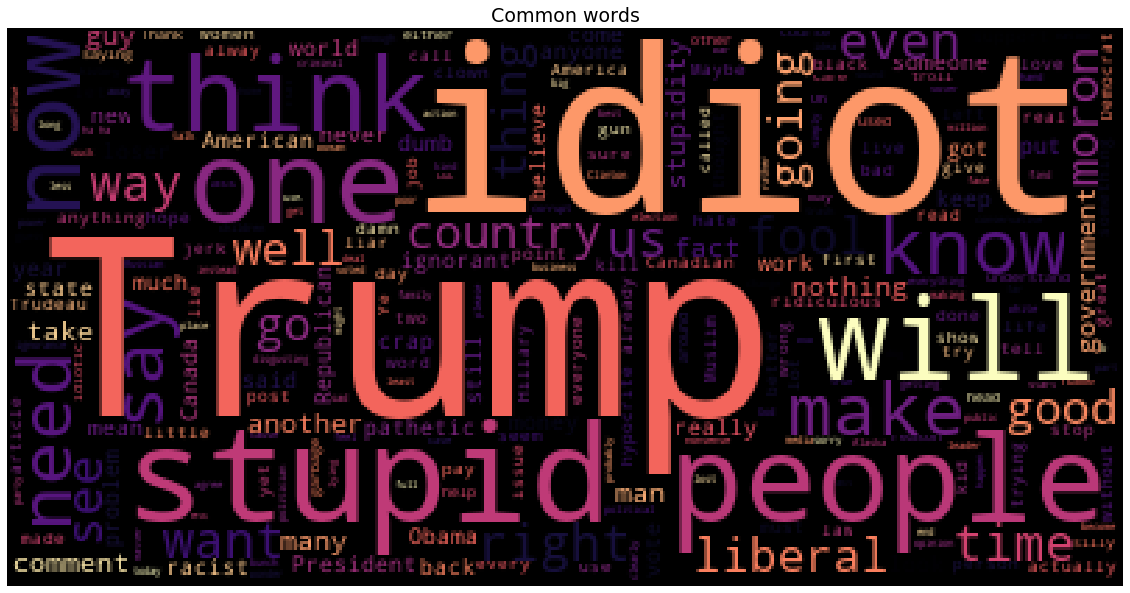

In [35]:
data=train_data[train_data.target>0.75]
generate_word_cloud(data, title = "Common words")

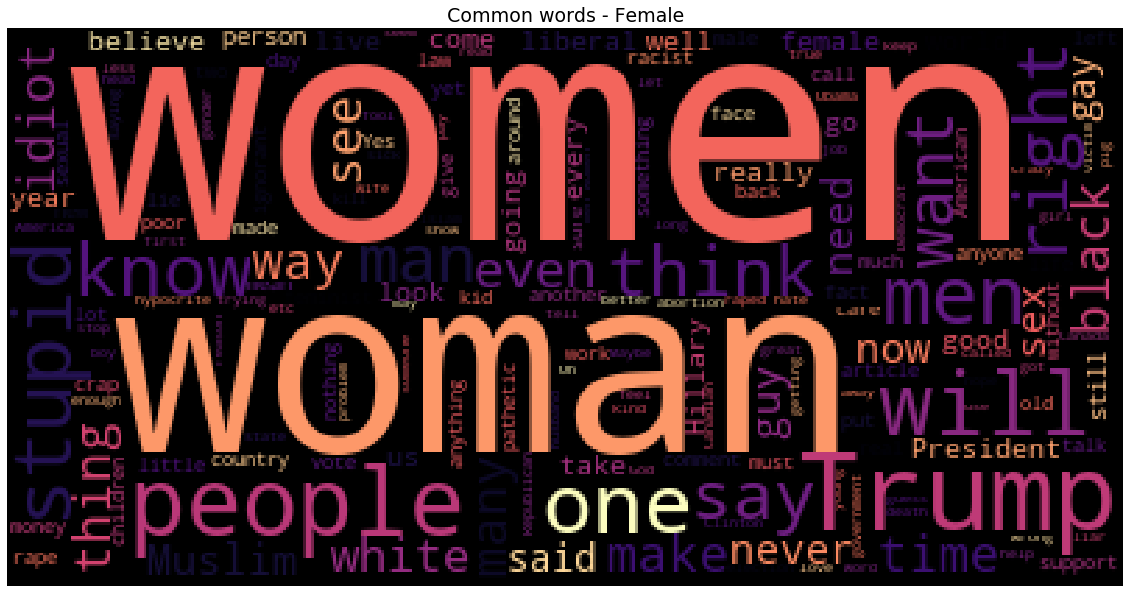

In [37]:
female_data = train_data[(train_data['female'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(female_data,title = "Common words - Female")

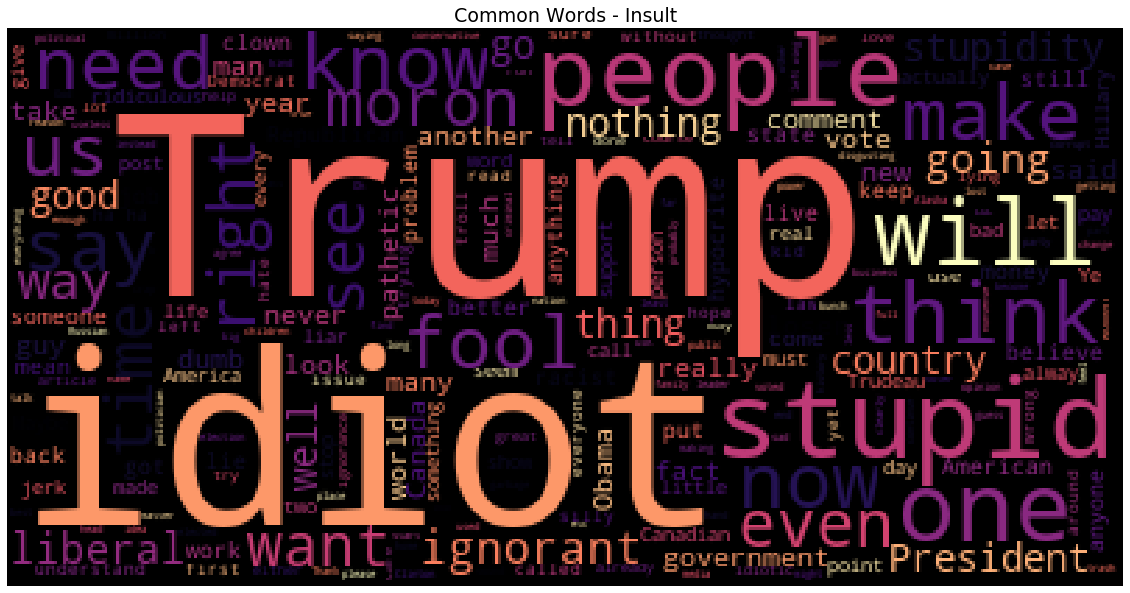

In [39]:
insult_data = train_data[(train_data['insult'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(insult_data, title = "Common Words - Insult")

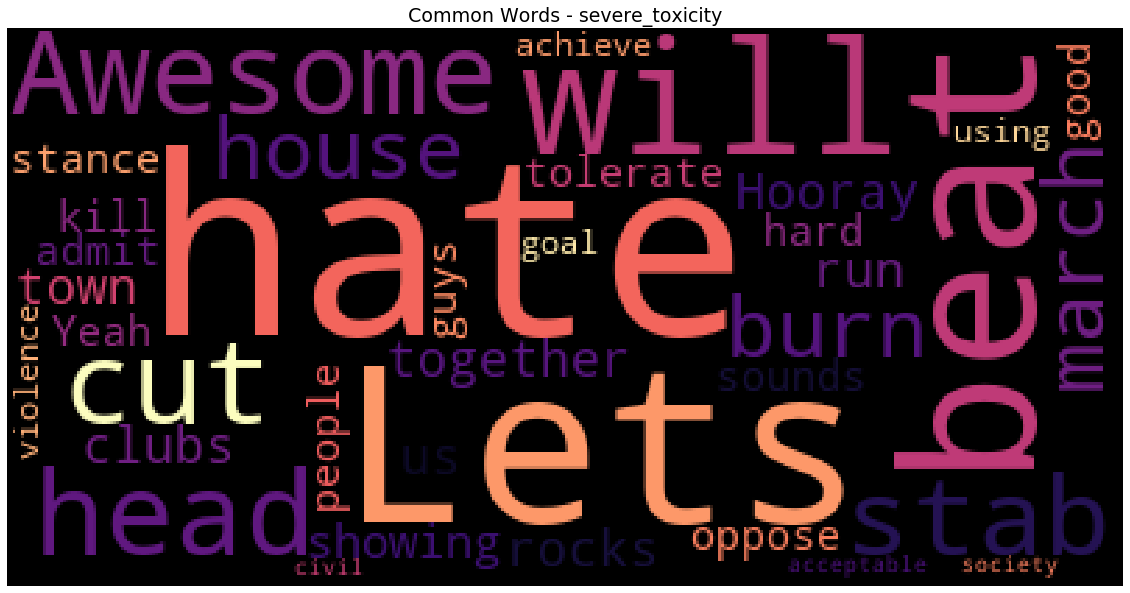

In [41]:
severe_toxicity_data = train_data[(train_data['severe_toxicity'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(severe_toxicity_data, title = "Common Words - severe_toxicity")

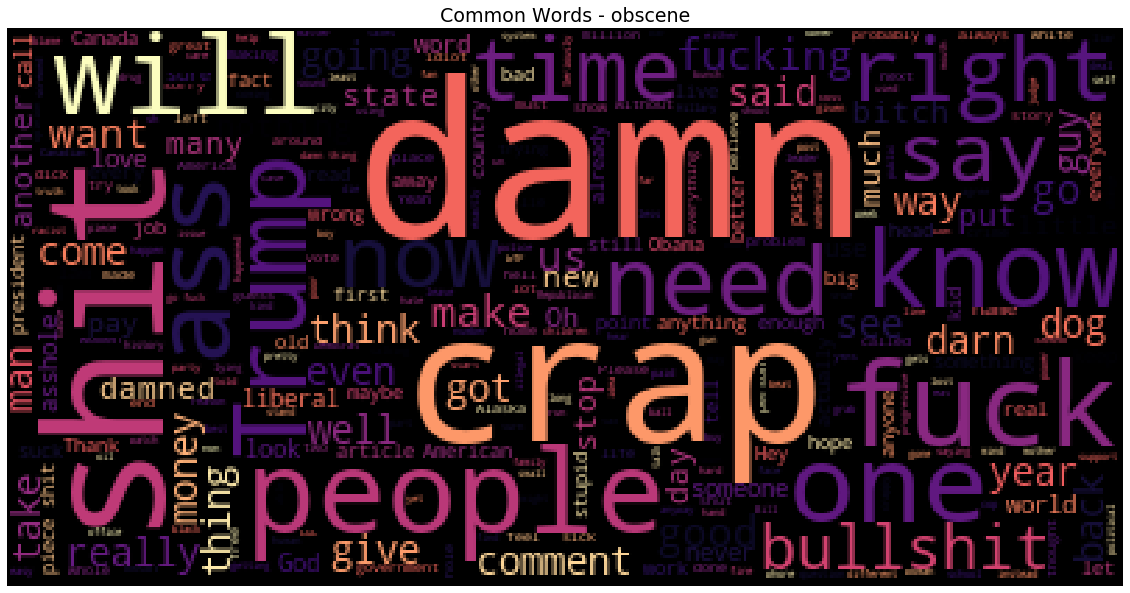

In [42]:
obscene_data = train_data[(train_data['obscene'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(obscene_data, title = "Common Words - obscene")

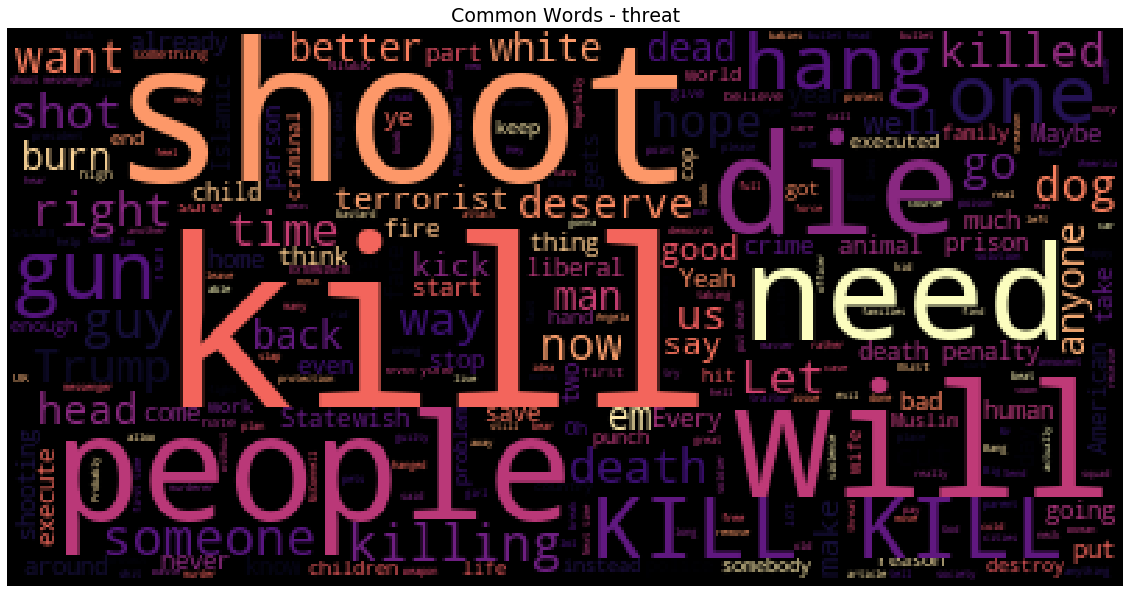

In [43]:
threat_data = train_data[(train_data['threat'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(threat_data, title = "Common Words - threat")

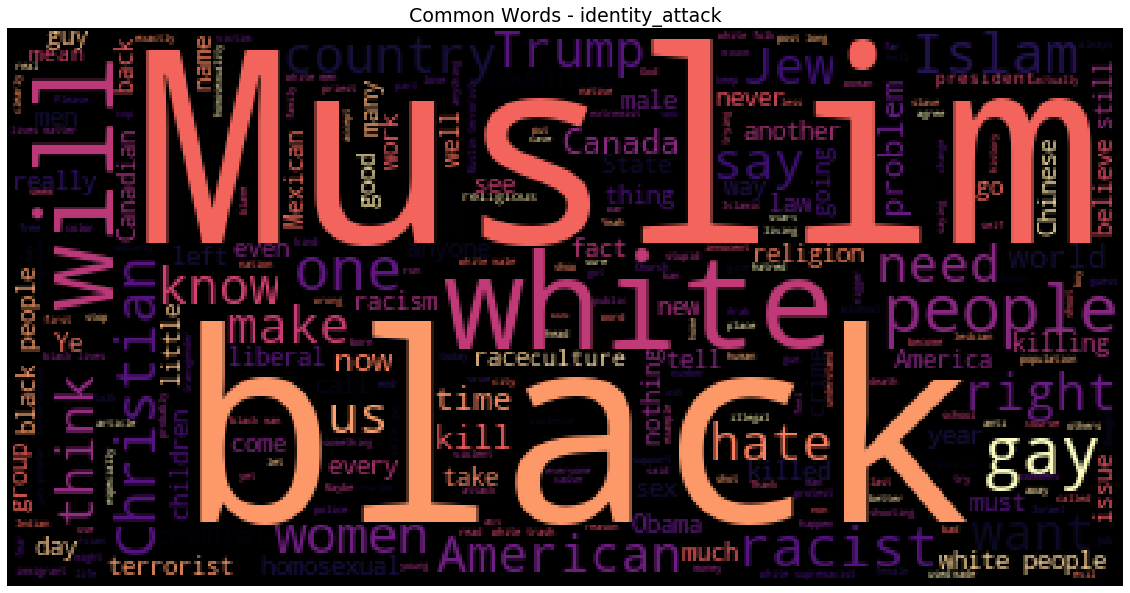

In [44]:
identity_attack_data = train_data[(train_data['identity_attack'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(identity_attack_data, title = "Common Words - identity_attack")

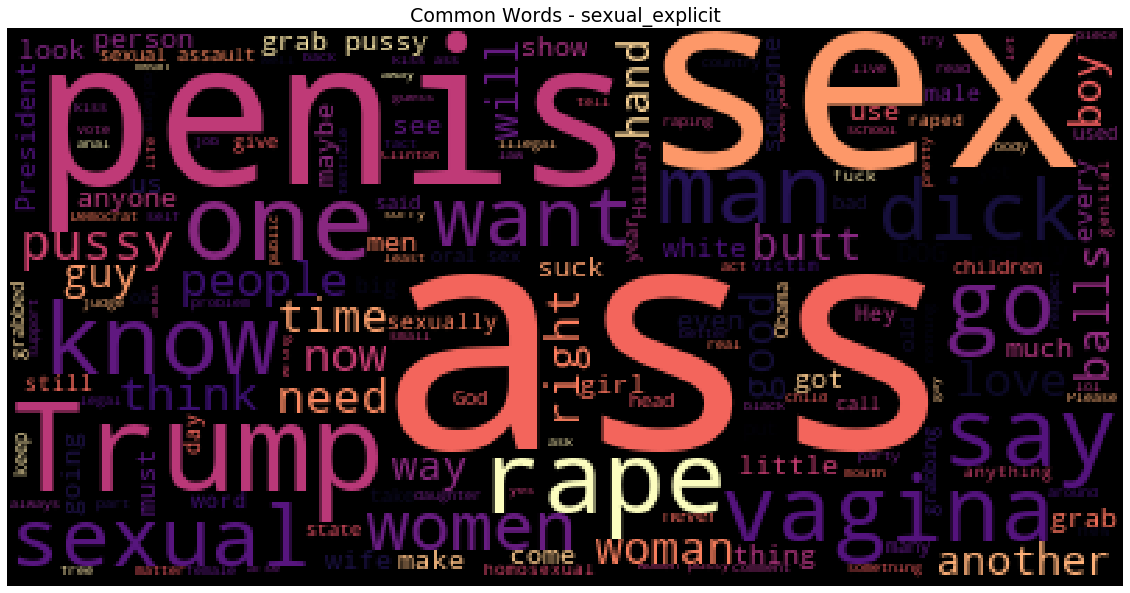

In [45]:
sexual_explicit_data = train_data[(train_data['sexual_explicit'] >0.75)&(train_data['target']>0.75)]
generate_word_cloud(sexual_explicit_data, title = "Common Words - sexual_explicit")